In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
class EDAProcessor:
    '''Perform Exploratory Data Analysis on the Whatsapp chat data.'''
    def __init__(self, data):
        '''
        Initialize the processor with the dataset.
        
        Parameters:
        - data (pd.DataFrame): The dataset to execute analysis.
        '''
        self.data = data

    def check_data_info(self):
        '''Display data types, missing values, duplicates, and unique values.'''
        print('Data types: \n', self.data.dtypes)
        print('\n Missing Values: \n', self.data.isnull().sum())
        print('\n Duplicate values: \n', self.data.duplicated().sum())
        print('\n Unique Vales: \n', self.data.nunique())
    
    def preprocess_timestamps(self):
        '''Convert timestamp column to datetime format and create new time-related features.'''
        self.data['timestamp'] = pd.to_datetime(self.data['timestamp'])
        self.data['date'] = self.data['timestamp'].dt.date
        self.data['year'] = self.data['timestamp'].dt.year
        self.data['month'] = self.data['timestamp'].dt.month
        self.data['hour'] = self.data['timestamp'].dt.hour

    def compute_message_statistics(self):
        '''Compute message statistics grouped by different time periods.'''
        message_count = self.data['sender'].value_counts()
        daily_messages = self.data.groupby('date').size()
        hourly_messages = self.data.groupby('hour').size()
        monthly_messages = self.data.groupby('month').size()
        yearly_messages = self.data.groupby('year').size()

        return message_count, daily_messages, hourly_messages, monthly_messages, yearly_messages
    
    def plot_statistics(self, message_count, daily_messages, hourly_messages, monthly_messages, yearly_messages):
        '''Generate visualizations for the computed statistics.'''
        plt.style.use('dark_background')
        plt.figure(figsize=(15, 15))

        # Messages per sender
        plt.subplot(3, 2, 1)
        sns.barplot(x=message_count.index, y=message_count.values, color='#075E54') # Whatsapp dark green
        plt.title('Messages per sender', fontsize=14, color='#25D366') # Whatsapp light green
        plt.xlabel(None)
        plt.grid(False)

        # Daily messages
        plt.subplot(3, 2, 2)
        sns.lineplot(x=daily_messages.index, y=daily_messages.values, color='#128C7E') # Whatsapp teal green
        plt.title('Daily messages', fontsize=14, color='#25D366')
        plt.xticks(rotation=90)
        plt.xlabel(None)
        plt.grid(False)

        # Hourly messages
        plt.subplot(3, 2, 3)
        sns.barplot(x=hourly_messages.index, y=hourly_messages.values, color='#34B7F1') # Whatsapp blue
        plt.title('Hourly messages', fontsize=14, color='#25D366')
        plt.xlabel(None)
        plt.grid(False)

        # Monthly messages
        plt.subplot(3, 2, 4)
        sns.barplot(x=range(12), y=monthly_messages.values, color='#DCF8C6') # Whatsapp tea green
        plt.title('Monthly messages', fontsize=14, color='#25D366') 
        months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'] # Format x-axis labels to show month names
        plt.xticks(range(12), months)
        plt.xlabel(None)
        plt.grid(False)

        # Yearly messages
        plt.subplot(3, 2, 5)
        sns.barplot(x=yearly_messages.index, y=yearly_messages.values, color='#ECE5DD') # Whatsapp light gray
        plt.title('Yearly messages', fontsize=14, color='#25D366')
        plt.xlabel(None)
        plt.grid(False)

        plt.tight_layout()
        plt.show()
    
    def generate_wordcloud(self):
        '''Generate and display a word cloud of all messages.'''
        all_messages = ' '.join(self.data['message'])
        wordcloud = WordCloud(width=800, height=400, background_color='#075E54', colormap='Blues').generate(all_messages)

        plt.style.use('seaborn-v0_8-darkgrid')
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Messages', fontsize=16, color='#075E54')
        plt.show()
    
    def perform_eda(self):
        '''Perform full EDA including data checks, preprocessing, statistics computation, and visualizations.'''
        # Step 1: Check basic data info
        self.check_data_info()
        
        # Step 2: Preprocess timestamps and create time-related features
        self.preprocess_timestamps()

        # Step 3: Compute message statistics
        stats = self.compute_message_statistics()

        # Step 4: Plot statistics
        self.plot_statistics(*stats)

        # Step 5: Generate word cloud
        self.generate_wordcloud()

        return stats
    
    def export_to_csv(self, output_path):
        '''
        Export the updated data to a CSV file.
        output_path: Path to save the CSV file.
        '''
        self.data.to_csv(output_path, index=False)
        print(f'Updated data exported successfully to {output_path}')

Data types: 
 timestamp         object
sender            object
message           object
message_length     int64
dtype: object

 Missing Values: 
 timestamp         0
sender            0
message           0
message_length    0
dtype: int64

 Duplicate values: 
 8

 Unique Vales: 
 timestamp          8364
sender                4
message           10857
message_length      191
dtype: int64


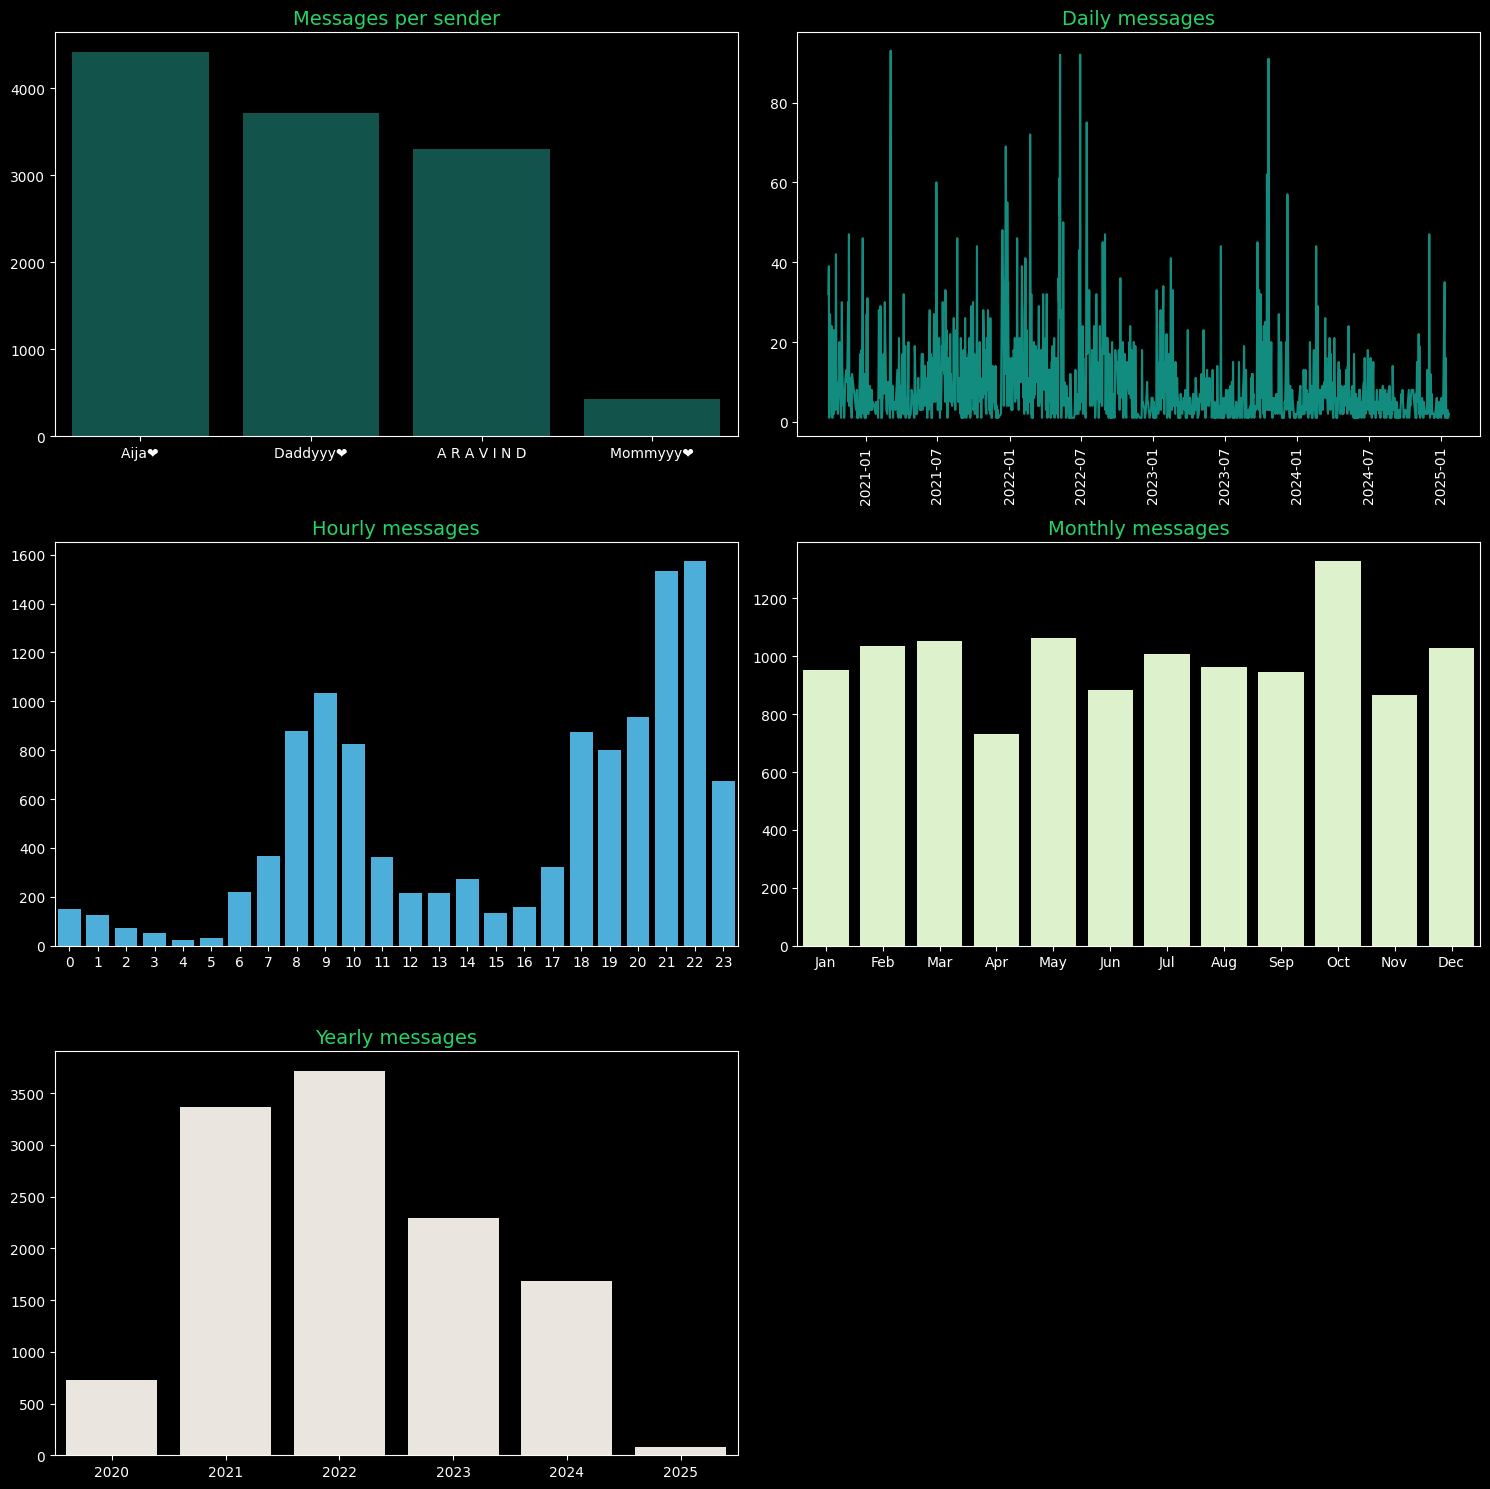

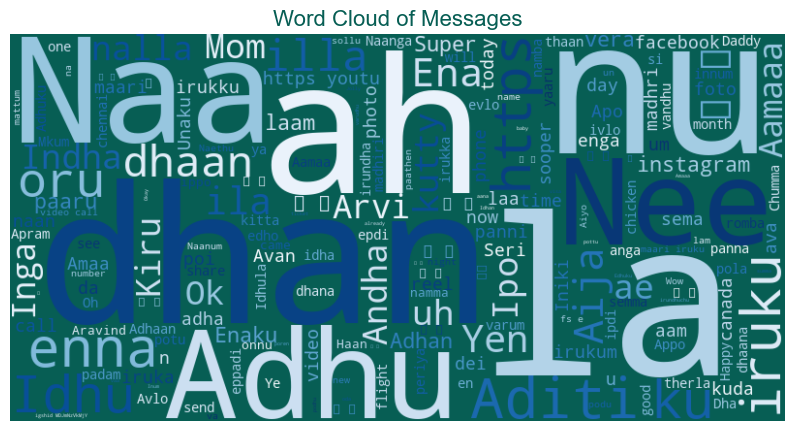

Updated data exported successfully to Whatsapp_Chat.csv


In [3]:
# Example Usage
# Load the data
data = pd.read_csv('Whatsapp_Chat.csv')

# Initialize the EDAProcessor class with data
eda = EDAProcessor(data)

# Perform EDA
message_count, daily_messages, hourly_messages, monthly_messages, yearly_messages = eda.perform_eda()

# Export to CSV
eda.export_to_csv('Whatsapp_Chat.csv')